# Data 422

### Bike Sharing System

## Assignement 1

The first thing we want to load **tidyverse** as we are working with data frames

In [193]:
library(tidyverse)

#### Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 


In [194]:
#remotes::install_github("ropensci/visdat")
library(skimr)
library(visdat)
library(lubridate)

In [229]:
#Reading .csv file from local directory 
bike_df <- "hour.csv" %>%
    read_csv()

Rows: 17379 Columns: 17

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): dteday
dbl (16): instant, season, yr, mnth, hr, holiday, weekday, workingday, weath...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [196]:
#nrow() and ncol() gives total number of rows and cols in the dataset
bike_df %>%
    nrow()
bike_df %>%
    ncol()


[1] 17379

[1] 17

In [197]:
#summary() gives the statistical data of each column in the dataframe 
summary(bike_df) # bike_df %>% summary() 

    instant         dteday              season            yr        
 Min.   :    1   Length:17379       Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   Class :character   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Mode  :character   Median :3.000   Median :1.0000  
 Mean   : 8690                      Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034                      3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379                      Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weathersit         te

In [198]:
#str() gives the structure of the dataframe by specifying details of each column as a variable, data type along with some initial values in separate rows
str(bike_df)

spec_tbl_df [17,379 x 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ instant   : num [1:17379] 1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : chr [1:17379] "1/01/2011" "1/01/2011" "1/01/2011" "1/01/2011" ...
 $ season    : num [1:17379] 1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : num [1:17379] 0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : num [1:17379] 1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : num [1:17379] 0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : num [1:17379] 0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : num [1:17379] 6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: num [1:17379] 0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: num [1:17379] 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num [1:17379] 0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num [1:17379] 0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num [1:17379] 0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num [1:17379] 0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : num [1:17379] 3 8 5 3 0 0 2 1 1 8 ...
 $ registered: num [1:17379] 13 32 27 1

In [199]:
#Displays the detailed statistical data of the dataframe
library(knitr)
bike_df %>%
    skim() %>%
    kable()



|skim_type |skim_variable | n_missing| complete_rate| character.min| character.max| character.empty| character.n_unique| character.whitespace| numeric.mean|   numeric.sd| numeric.p0| numeric.p25| numeric.p50| numeric.p75| numeric.p100|numeric.hist                             |
|:---------|:-------------|---------:|-------------:|-------------:|-------------:|---------------:|------------------:|--------------------:|------------:|------------:|----------:|-----------:|-----------:|-----------:|------------:|:----------------------------------------|
|character |dteday        |         0|             1|             9|            10|               0|                731|                    0|           NA|           NA|         NA|          NA|          NA|          NA|           NA|NA                                       |
|numeric   |instant       |         0|             1|            NA|            NA|              NA|                 NA|                   NA| 8690.0000000| 5017.02

In [200]:
#Used for getting information about missing values in the dataframe
library(visdat)

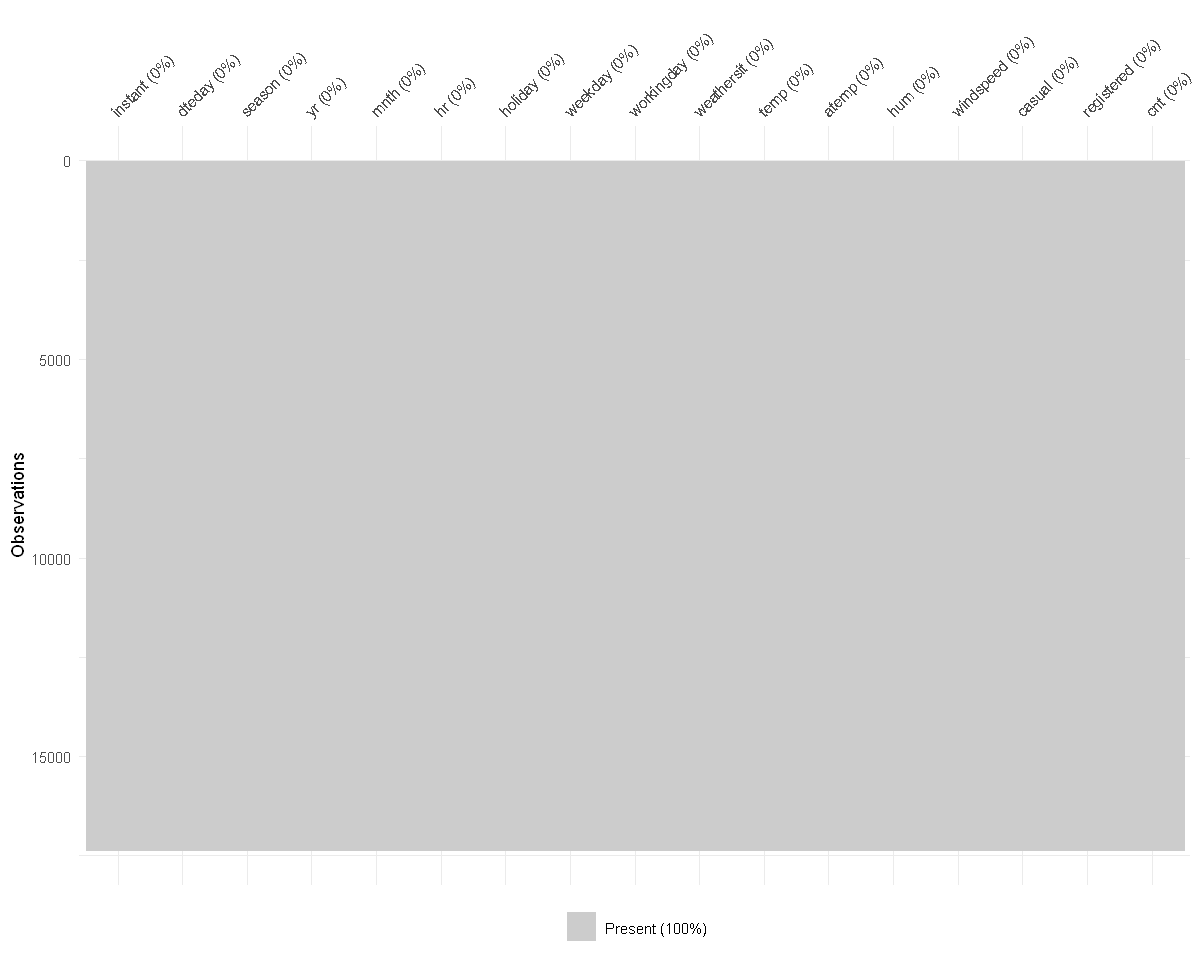

In [201]:
bike_df %>%
    vis_miss()

In [202]:
#Converting date column from character datatype to date type, format of the date should be specified. Y is used for year instead of yyyy
bike_df$dteday <- as.Date(bike_df$dteday, format= "%d/%m/%Y")

In [203]:
#Converting a single variable into a factor
bike_df$season <- as.factor(bike_df$season)

In [204]:
#Converting a group of variables into factor
#lapply() coerce and replaces the chosen columns
fact_cols <- c("yr","mnth", "holiday", "workingday", "weathersit")

In [205]:
bike_df[fact_cols] <- lapply(bike_df[fact_cols], factor)

In [206]:
#levels() checks the categories of a variable  
levels(bike_df$season)

[1] "1" "2" "3" "4"

In [207]:
#using characters as categories
bike_df$season <- factor(bike_df$season, labels=c("Spring", "Summer", "Fall", "Winter"), levels=c(1, 2, 3, 4))

In [208]:
#using numbers as categories
bike_df$yr <- factor(bike_df$yr, labels=c("2011", "2012"), levels=c(0,1))

In [209]:
#mutate() is used to change labels
bike_df %>%
  head(5) %>%
  mutate(weekday = factor(weekday,
         levels = c(0,1,2,3,4,5,6),
         labels = c("Sunday",
                    "Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday",
                    "Saturday")))

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,Spring,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,Spring,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0,8,32,40
3,2011-01-01,Spring,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0,5,27,32
4,2011-01-01,Spring,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,Spring,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0,0,1,1


### working on rows


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).


In [210]:
bike_df %>%
    arrange (desc(registered, weekday)) %>% #using two variables to arrange them in descending order 
    filter(hr == 6) %>% # filters for hr eqals to 6
    select(registered, weekday,hr, dteday, cnt) %>% #selecting a group of variables
    top_n(-2,registered) #prints the last two rows, here there are more than 2 because the registered column has more ties    

registered,weekday,hr,dteday,cnt
<dbl>,<dbl>,<dbl>,<date>,<dbl>
1,0,6,2011-01-09,1
1,0,6,2011-01-16,1
1,0,6,2011-01-23,1
1,0,6,2011-02-06,1
1,6,6,2011-02-12,2
1,0,6,2011-02-20,2
1,0,6,2011-02-27,3
1,0,6,2011-03-06,2
1,6,6,2011-10-29,5


In [12]:
#here same as above but top_n(2) gives only 2 rows as there are no ties
bike_df %>%
    arrange (desc(registered, weekday)) %>%
    filter(hr == 6) %>%
    select(registered, weekday,hr, dteday, cnt) %>%
    top_n(2,registered)    

registered,weekday,hr,dteday,cnt
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
203,3,6,5/09/2012,210
200,2,6,11/09/2012,211


In [211]:
#Function created to extracts the data related to the users using column indexing to see the pattern whether the day is holiday or not when casual = registered   
bike_users <- function(df, output){  
    
    if(df[15] == df[16]) {
        cat(df[2],"   Casual Users = ",df[15],"    Registered Users = ",df[16],"     ",df[7],"\n")
    } 
}
apply(bike_df, 1, bike_users) #2, 7, 15 and 16 are column numbers for dteday, holiday, casual and registered

2011-01-01    Casual Users =   47     Registered Users =   47       0 
2011-01-16    Casual Users =    1     Registered Users =    1       0 
2011-01-19    Casual Users =    1     Registered Users =    1       0 
2011-01-23    Casual Users =    1     Registered Users =    1       0 
2011-02-07    Casual Users =    1     Registered Users =    1       0 
2011-02-08    Casual Users =    1     Registered Users =    1       0 
2011-02-12    Casual Users =    1     Registered Users =    1       0 
2011-02-14    Casual Users =    1     Registered Users =    1       0 
2011-02-19    Casual Users =    3     Registered Users =    3       0 
2011-02-20    Casual Users =    9     Registered Users =    9       0 
2011-02-20    Casual Users =    1     Registered Users =    1       0 
2011-02-25    Casual Users =    1     Registered Users =    1       0 
2011-02-26    Casual Users =    1     Registered Users =    1       0 
2011-03-01    Casual Users =    1     Registered Users =    1       0 
2011-0

NULL

In [212]:
# .data pronoun is use to refer to column names that are stored as strings
vars <- c("casual", "registered")
cond <- c(80, 150)
bike_df %>%
    filter(
        .data[[vars[[1]]]] > cond[[1]],
        .data[[vars[[2]]]] > cond[[2]]
      ) %>%
    select(season, dteday, cnt, casual, registered) %>%
    arrange(desc(cnt)) %>%
    head(5)
    
    

season,dteday,cnt,casual,registered
<fct>,<date>,<dbl>,<dbl>,<dbl>
Fall,2012-09-12,977,91,886
Fall,2012-09-20,976,91,885
Fall,2012-09-11,970,168,802
Fall,2012-09-10,968,111,857
Winter,2012-09-25,967,107,860


#### Working on columns of `bike_df` using select(), rename(), drop(), order()...

In [213]:
#Here select() selects particular columns from the dataframe and an object is created as a dataframe to store that data in it
bike_temp <- select(bike_df, c(cnt, season, hr, temp, hum, windspeed));     

In [214]:
#Randomly selects the rows and prints the above stored from bike_temp
bike_temp %>%
    sample_n(5)

cnt,season,hr,temp,hum,windspeed
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
58,Spring,6,0.20,0.69,0.1940
21,Spring,3,0.36,0.93,0.1642
86,Spring,11,0.30,0.75,0.0896
146,Summer,22,0.50,0.72,0.2537
183,Spring,11,0.24,0.81,0.1045


In [111]:
#Renaming the columns
bike_df %>%
    rename(Date = dteday,
           Season = season,
           Year = yr,
           Month = mnth,
           Hour = hr,
           Temperature = temp,
           Humidity = hum,
           BikeUsers = cnt
    ) %>%
    slice(10:14)

instant,Date,Season,Year,Month,Hour,holiday,weekday,workingday,weathersit,Temperature,atemp,Humidity,windspeed,casual,registered,BikeUsers
<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,1/01/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14
11,1/01/2011,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36
12,1/01/2011,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56
13,1/01/2011,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84
14,1/01/2011,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94


In [215]:
# Selecting the columns that end with 'day' using ends_with() which is a helper function for select
bike_df %>% 
    select(ends_with("day")) %>%
    sample_n(5)

dteday,holiday,weekday,workingday
<date>,<fct>,<dbl>,<fct>
2012-02-05,0,0,0
2012-02-03,0,5,1
2011-12-03,0,6,0
2012-03-27,0,2,1
2011-12-08,0,4,1


In [216]:
# contains() is another helper function for select
#-contains("te") selects the columns other than those that has letters "te" in them  
#dteday, temp, atemp and registered columns are dropped
bike_df %>% select(-contains("te"))%>%
    tail()

instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,casual,cnt
<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
17374,Spring,2012,12,18,0,1,1,2,0.48,0.1343,10,122
17375,Spring,2012,12,19,0,1,1,2,0.60,0.1642,11,119
17376,Spring,2012,12,20,0,1,1,2,0.60,0.1642,8,89
17377,Spring,2012,12,21,0,1,1,1,0.60,0.1642,7,90
17378,Spring,2012,12,22,0,1,1,1,0.56,0.1343,13,61
17379,Spring,2012,12,23,0,1,1,1,0.65,0.1343,12,49


In [44]:
#Reordering the column names in alphabetical order '.' represents all
bike_df %>% select(order(colnames(.)))%>%
    tail()

atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
<dbl>,<dbl>,<dbl>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
0.2727,10,122,2012-12-31,0,18,0.48,17374,12,112,Spring,0.26,2,1,0.1343,1,2012
0.2576,11,119,2012-12-31,0,19,0.60,17375,12,108,Spring,0.26,2,1,0.1642,1,2012
0.2576,8,89,2012-12-31,0,20,0.60,17376,12,81,Spring,0.26,2,1,0.1642,1,2012
0.2576,7,90,2012-12-31,0,21,0.60,17377,12,83,Spring,0.26,1,1,0.1642,1,2012
0.2727,13,61,2012-12-31,0,22,0.56,17378,12,48,Spring,0.26,1,1,0.1343,1,2012
0.2727,12,49,2012-12-31,0,23,0.65,17379,12,37,Spring,0.26,1,1,0.1343,1,2012


#### Working on `bike_df`, by producing new variables (columns) while modifying existing one; by operating on the dataframe as a whole and on groups.

In [217]:
library(lubridate) # has the functions that extract the information from date 
by_month <- bike_df %>% # object is created 
  mutate_at(vars(dteday), funs(year, month, day)) %>% # using funs() the year, month and day is extracted from the "dteday"
  group_by(month) %>%# then grouped by the extracted month
  summarise(Total_count = sum(cnt), median_count= median(cnt), min(cnt), max(cnt)) #and then the sum, median, min and max for "cnt" is obtained
by_month   

month,Total_count,median_count,min(cnt),max(cnt)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,134933,66.0,1,559
2,151352,82.0,1,610
3,228920,104.0,1,957
4,269094,136.0,1,822
5,331686,188.5,1,873
6,346342,203.0,1,900
7,344948,202.0,1,913
8,351194,204.0,1,941
9,345991,190.0,1,977


In [87]:
#Extracting the total number of holidays by year during spring season and also from the whole dataset 
bike_df %>%
    filter(yr==2012 & season=="Spring") %>%
    group_by(holiday) %>%
    tally()
bike_df %>%
    tally()

holiday,n
<fct>,<int>
0,2081
1,93


n
<int>
17379


In [218]:
bike_df %>%
    filter(yr == "2011", weekday == 6) %>%
    group_by(season) %>%
    summarise(Total_Count = sum(cnt)) %>%
    arrange(desc(Total_Count)) 

season,Total_Count
<fct>,<dbl>
Fall,58430
Summer,51459
Winter,47680
Spring,22174


### The long and the wide format of a dataframe. Then produced a tidy version of `bike_df` 

In [219]:
bike_df %>%
  spread(key = season,
         value = registered) %>%
  select(yr,"Spring":"Winter") %>%
  head(5)

yr,Spring,Summer,Fall,Winter
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2011,13,NA,NA,NA
2011,32,NA,NA,NA
2011,27,NA,NA,NA
2011,10,NA,NA,NA
2011,1,NA,NA,NA


In [56]:
bike_df %>%
  spread(key = season,
         value = registered) %>%
  select(yr,"Spring":"Winter") %>%
  na.omit()%>%
  head(5)

yr,Spring,Summer,Fall,Winter
<fct>,<dbl>,<dbl>,<dbl>,<dbl>


In [220]:
bike_df %>%
  gather(key = dteday,
         value = yr,mnth,hr) %>%
  na.omit()%>%
  head(5)

Warning message:
"attributes are not identical across measure variables;
they will be dropped"


instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday,yr
<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Spring,0,6,0,1,0.24,0.2879,0.81,0,3,13,16,mnth,1
2,Spring,0,6,0,1,0.22,0.2727,0.80,0,8,32,40,mnth,1
3,Spring,0,6,0,1,0.22,0.2727,0.80,0,5,27,32,mnth,1
4,Spring,0,6,0,1,0.24,0.2879,0.75,0,3,10,13,mnth,1
5,Spring,0,6,0,1,0.24,0.2879,0.75,0,0,1,1,mnth,1


#### From the vis_miss() shows that it is a tidy data and also each row has a single observation, each column has respective variable name and value. No null/empty value in the data.
By using spread() and gather() null and empty values are created.

### Graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. 

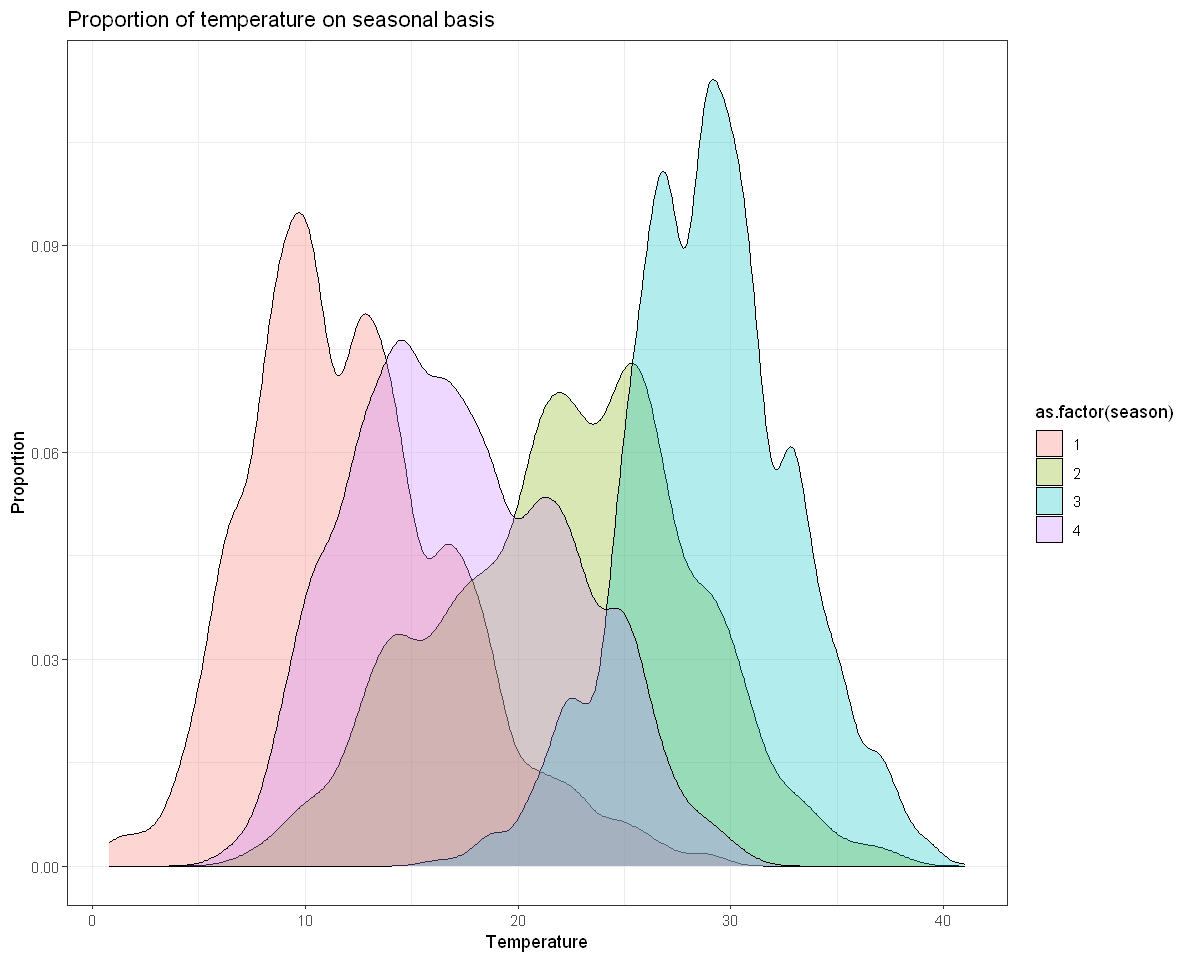

In [157]:
# Plotting the proportion of temperature on seasonal basis 
options(repr.plot.width=10, repr.plot.height=8)
ggplot(bike_df, aes(x=(temp*41), fill=as.factor(season), grade=1)) +
  geom_density(alpha=0.3)+
  labs(title = "Proportion of temperature on seasonal basis",
       x = "Temperature",
       y = "Proportion",
       colour = "Season") +
  guides(color = guide_legend(override.aes = list(size = 3)))+
  theme_bw()

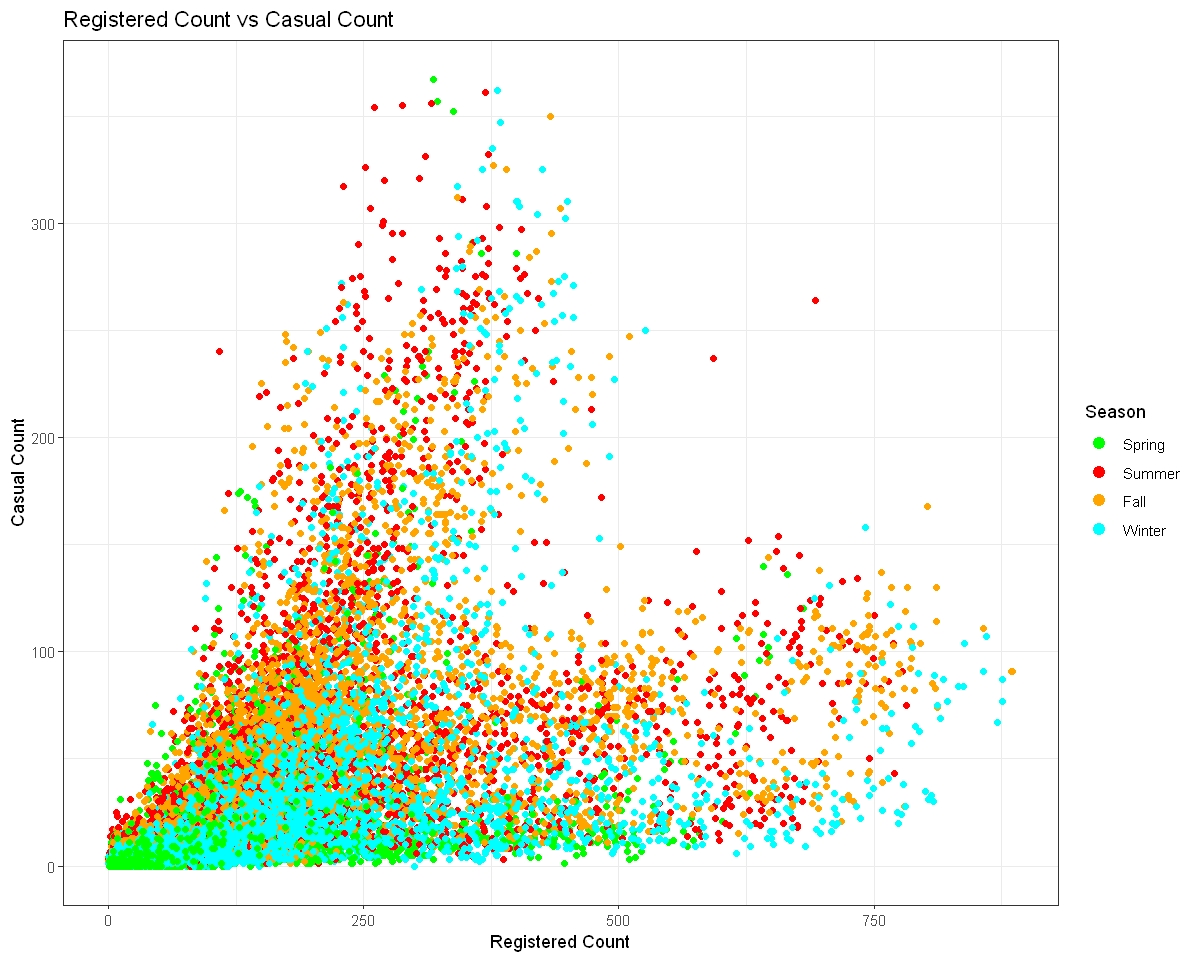

In [167]:
# Plotting registered count vs casual count 
ggplot(bike_df, aes(x = registered, y = casual, colour = season)) +
    geom_point() +
    labs(x = "Registered Count",
         y = "Casual Count",
         title = "Registered Count vs Casual Count"
        )+
    scale_color_manual("Season", values=c("green","red","orange","cyan"))+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    theme_bw()

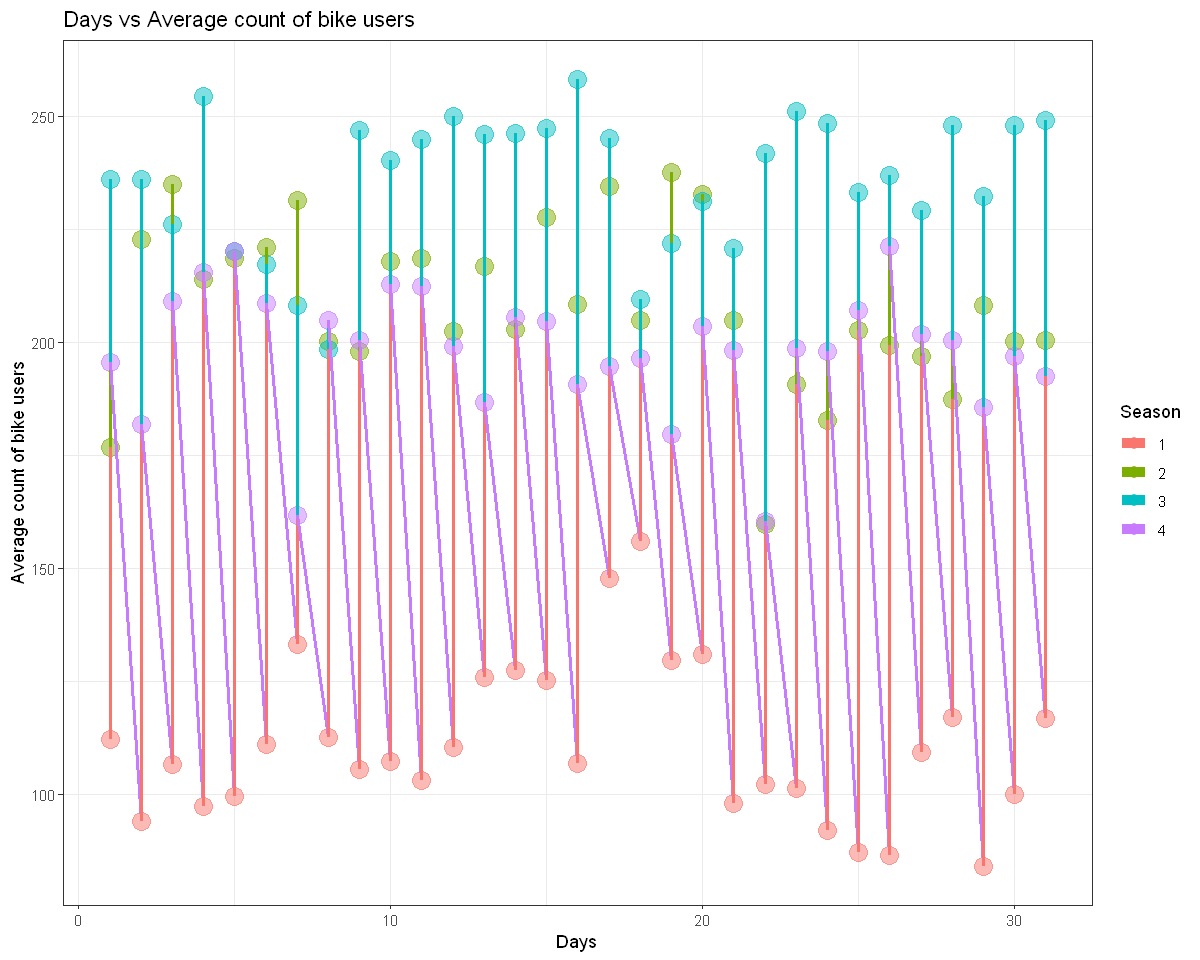

In [158]:
#Average count of bike users for a period of 30 days in all seasons is calculated and plotted  
options(repr.plot.width=10, repr.plot.height=8)
bike_df %>% 
  mutate(days = year(dteday)) %>% 
  group_by(days, season) %>% 
  summarise(
    avg_count = mean(cnt, na.rm = TRUE), .groups="keep") %>% 
  ggplot(aes(days, avg_count, colour = as.factor(season), group=1))+
    geom_point(size=5, alpha = 0.5)+
    geom_line(size=1)+
    guides(color = guide_legend(override.aes = list(size = 3)))+
    labs(title = "Days vs Average count of bike users",
          x = "Days",
          y = "Average count of bike users",
          colour = "Season")+
    theme(axis.text.x = element_text(size = 14), axis.title.x = element_text(size = 16),
          axis.text.y = element_text(size = 14), axis.title.y = element_text(size = 16),
          legend.text=element_text(size=10))+
    theme_bw()

#### Save these plots to disk. 

In [221]:
#Checks for the current working directory
getwd()

[1] "C:/Users/Paturi/DATA422Lab/Assignment1"

In [222]:
#Set the working directory
setwd('C:/Users/Paturi/DATA422Lab/Assignment1')

In [223]:
# Writing dataframe to CSV file
write_csv(bike_df, "bike.csv")

In [224]:
# The plot is saved as png using function ggsave(), lastplot() function takes the latest created plot
ggsave("proportion_temp.png", plot = last_plot())

Saving 6.67 x 6.67 in image



### Challenge question

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

###
Solution (Challenge question)
Task 1: The count of registered bike users along with a time period of 16 hours for all the days in the week and for four seasons is plotted in a graph to show the number of bike users with respect to seasonality who hired the bike for x number of hours and faceted it with respect to each week day. 
From the plot, it is evident that the peak times for the registered user is between 6am to 10am and from 5pm to 9pm on working days only. 


In [225]:
by_hr_temp = bike_df %>%
    group_by(hr, dteday, temp, registered,season) %>%
    mutate(temp = temp * 41 ) 
by_hr=by_hr_temp %>%
    filter(hr >= 17, hr <=22) %>%
    group_by(hr,dteday, temp,season) %>%
    select(temp, dteday, hr,  season)   
by_reg=by_hr_temp %>%
    summarise(dteday = dteday + ddays(1))%>% # ddays() i.e., from lubridate is used to add one day to the "dteday" 
    group_by(dteday, registered, temp, hr, season)%>%
    filter(hr >= 5, hr <= 10) %>%
    select(hr, dteday, registered, temp,  season)  

`summarise()` has grouped output by 'hr', 'dteday', 'temp', 'registered'. You can override using the `.groups` argument.



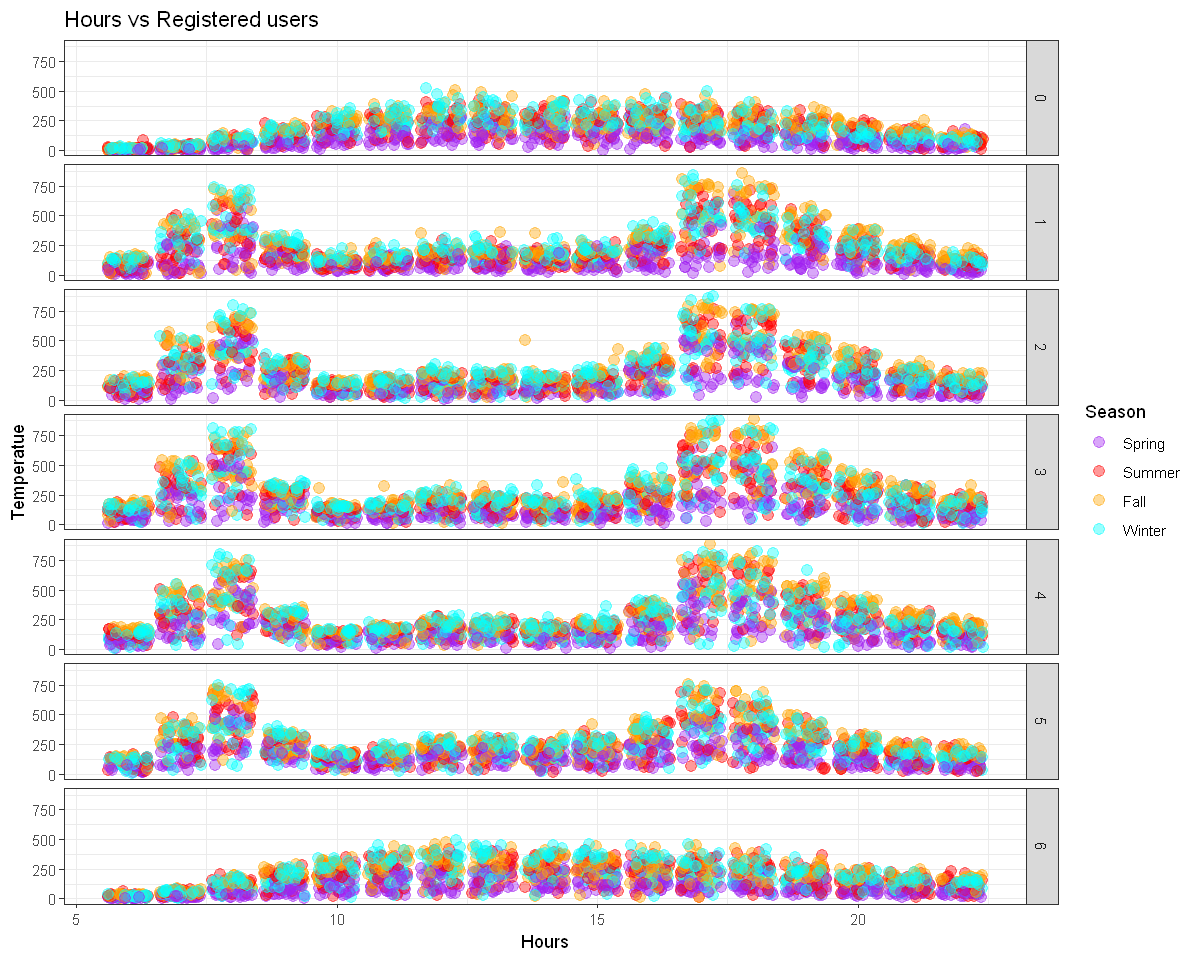

In [232]:
options(repr.plot.width=10, repr.plot.height=8)
by_hr_temp %>% 
  group_by(hr,registered, season) %>% 
  filter(hr >= 6, hr<=22)%>%
  ggplot(bike_df, mapping=aes(hr, registered, colour=season,, group=1))+
    geom_jitter(size=3, alpha = 0.4)+
    facet_grid(vars(weekday))+
  guides(color = guide_legend(override.aes = list(size = 3)))+
  scale_color_manual("Season", values=c("purple","red","orange","cyan"))+
  labs(title="Hours vs Registered users",x = "Hours", y = "Temperatue")+
  theme_bw()

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

**Hint: Make your plots with some colour, good font size and visualisation.**

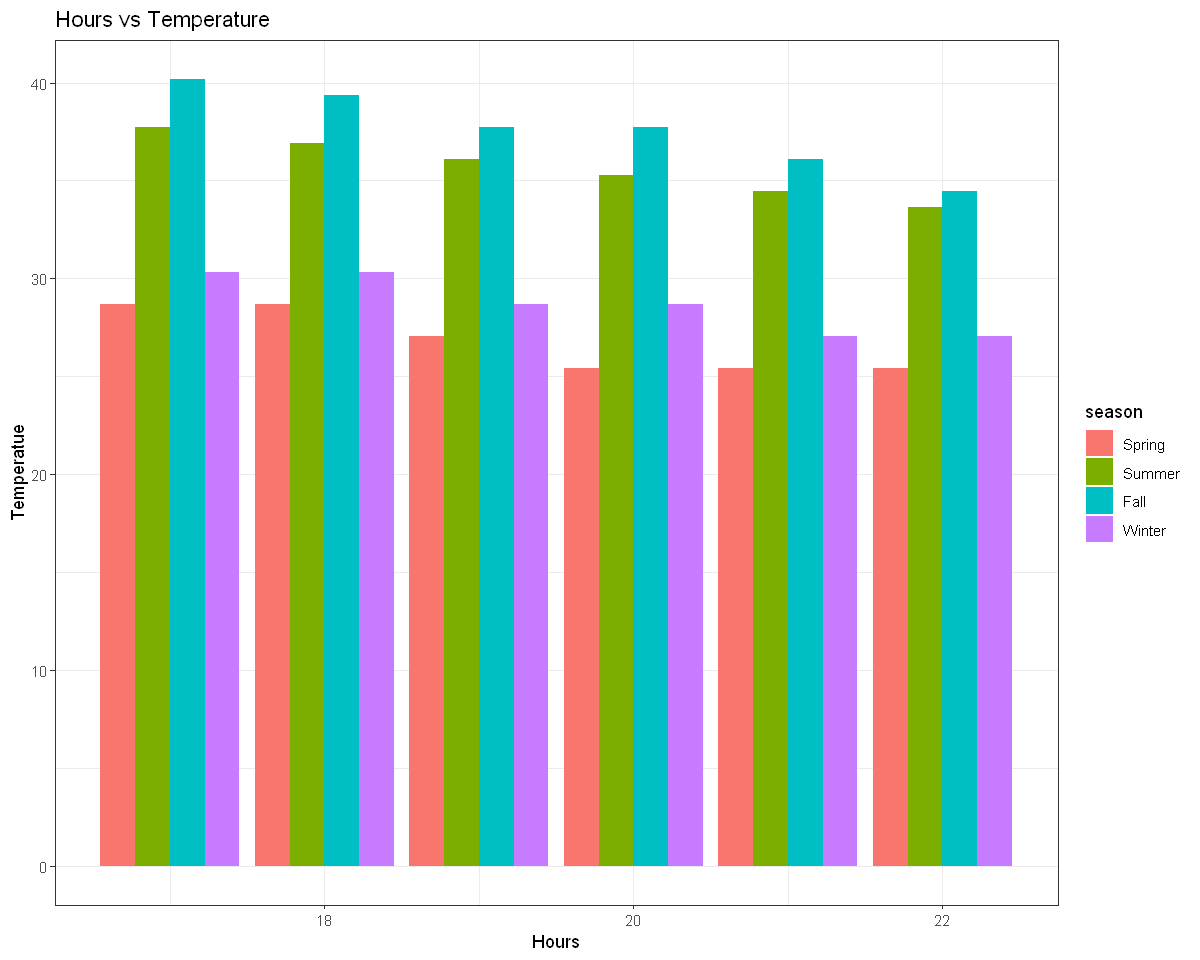

In [227]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(by_hr, aes(hr,temp, fill = season)) +
  geom_col(position = "dodge") +
  labs(title="Hours vs Temperature",x = "Hours", y = "Temperatue")+
  theme_bw()

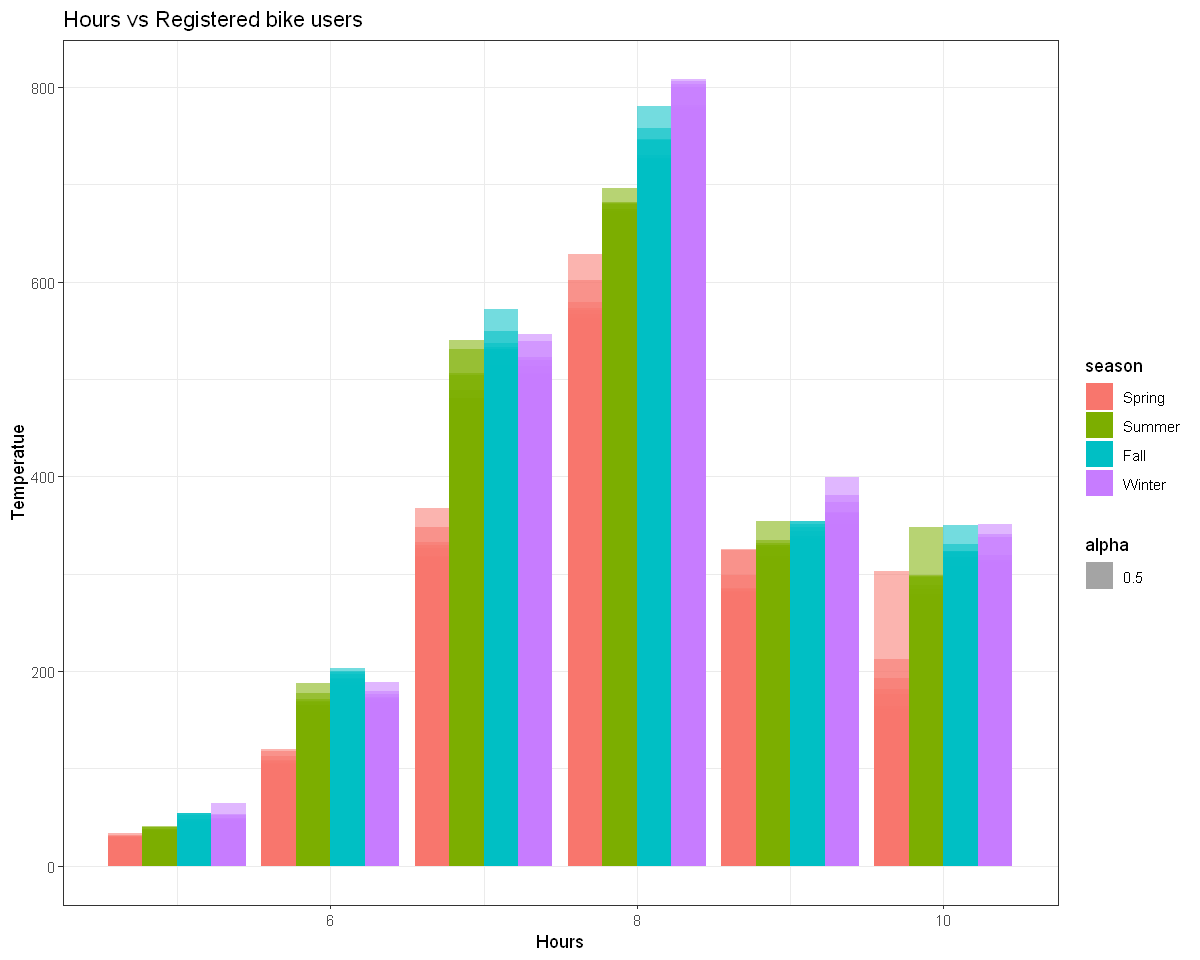

In [228]:
ggplot(by_reg, aes(hr, registered, fill = season)) +
  geom_col(position = "dodge", aes(alpha=0.5)) +
  labs(title = "Hours vs Registered bike users",
       x = "Hours",
       y = "Temperatue",
       colour = "Season")+
  theme_bw()


